NOTIONS DE BASE 


In [ ]:
import numpy as np
import pandas as pd

In [8]:
#Création d'une matrice à 2 dimension. (nombre ligne, nombre colonnes) avec Numpy
array = np.random.random((2,5))

#Visualiser la matrice 
array


array([[0.28749944, 0.1416387 , 0.53118189, 0.12806039, 0.49171222],
       [0.02173715, 0.2159352 , 0.70032911, 0.98972289, 0.22133909]])

In [9]:
# Visualiser les dimensions de la matrice. 
array.shape

(2, 5)

In [25]:
## PARTIE PADNDAS ## 
#création d'un data set avec PANDA, qui groupe des pays et leurs capitaux et populations : 
data = {'Country': ['Belgium', 'India', 'Brazil'],
 'Capital': ['Brussels', 'New Delhi', 'Brasília'],
 'Population': [11190846, 1303171035, 207847528]}
#Mettre data dans un dataframe avec PANDA, en précisant nom des colonnes.
df = pd.DataFrame(data,
 columns=['Country', 'Capital', 'Population'])
#visualiser le data frame
df


,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [29]:
#recuperer les country :
df['Country']


0    Belgium
1      India
2     Brazil
Name: Country, dtype: object

In [30]:
# Recuperer les Capital
df['Capital']

0     Brussels
1    New Delhi
2     Brasília
Name: Capital, dtype: object

In [23]:
#Shape du data frame
df.shape



(3, 3)

In [34]:
 #Recuperer l'element du premiere ligne et deuxiéme colonne ; df.iloc[[indice_ligne], [indice_colonne]]
df.iloc[[0],[1]] 

,Capital
0,Brussels


In [33]:
#Recupere premier element de la colonne country
df.loc[[0], ['Country']] 

,Country
0,Belgium


In [35]:
#Selectionner les pays avec la population supérieur à nombre. 
df[df['Population']>1200000000] 

,Country,Capital,Population
1,India,New Delhi,1303171035


In [36]:
# Compter le nombre d'observation par colonne 
df.count() 

Country       3
Capital       3
Population    3
dtype: int64

In [40]:
#Somem 
df.sum() 
#Descriptive statistiques 
df.describe() 
#Moyenne des valeurs 
df.mean()
# Median des valeurs 
df.median() 

Population    207847528.0
dtype: float64

In [ ]:
#Lire et importer un fichier CSV avec PANDA  (lien du fichier, si le fichier a des nom de colonnes, nombre de colonne )
pd.read_csv('file.csv', header=None, nrows=5)


In [124]:
## MACHINE LEARNING, NOW WE START. 
## DIVISION du data set, en partie d'apprentissage (train) et partie de validation (test)
# ON IMPORTE IRIS un dataSet de Sickit; (iris contient une liste des fleurs..)

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data # Apprentissage
y=iris.target # TEST
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [ ]:
## DANS LE CAS DE VALEURS NULL OU MANQUANTES. 
# DANS LE CAS de valeur manquantes on va ajouter des valeurs, 
#on va remplace les NA (valeure nulle) avec la moyenne de toute les observations
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=None, strategy='mean', axis=0)
df["Population"] =  imp.fit_transform(df[["Population"]])

In [148]:
#REGRESSION LINEAIRE  

from sklearn.linear_model import LinearRegression

#Extraction de Data a partir du net (un exemple)
path = 'https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'
df = pd.read_csv(path)
X= df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df['price']
#Entrainer le modele REG

lm = LinearRegression()
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

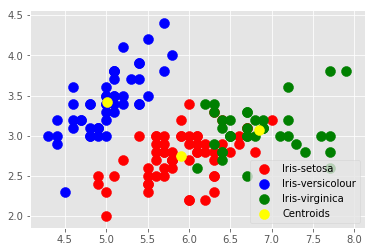

In [159]:
## CLUSTERING ##
#KMEANS 
from sklearn.cluster import KMeans
X_IRIS = iris.data
# nombre de cluster =3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_IRIS)

#Visuaiser les différents groupes X_IRIS[y_kmeans == 0 (nombre de cluster), 0 (colonne)] 
plt.scatter(X_IRIS[y_kmeans == 0, 0], X_IRIS[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X_IRIS[y_kmeans == 1, 0], X_IRIS[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X_IRIS[y_kmeans == 2, 0], X_IRIS[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

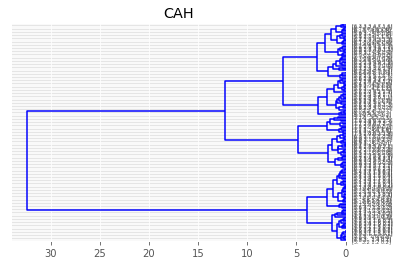

In [163]:
#CAH - CLUSTERING ASCENDANT HIERARCHIQUE 

#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#générer la matrice des liens ( metrique de distance euclidenne avec methode de ward  )
Z = linkage(X_IRIS,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=X_IRIS,orientation='left',color_threshold=0)
plt.show()

[0]
[0.1380943  0.24462418]


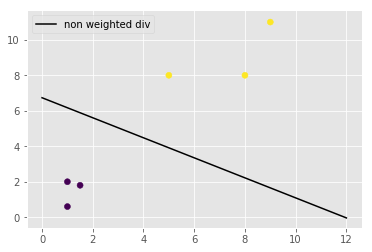

accuracy avec SVM pour iris : 0.96


In [133]:
## SUPERVISED MACHINE LEARNING 
## CLASSIFICATION 
#Support Vector Machines (SVM) pour classification 

from sklearn.svm import SVC, LinearSVC
from sklearn import svm

X = np.array([[1,2],
             [5,8],
             [1.5,1.8],
             [8,8],
             [1,0.6],
             [9,11]])

y = [0,1,0,1,0,1]
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)

#Predire ça et il va donner  classe y = 0 
print(clf.predict([[0.58,0.76]]))

# Visualiser La classification 

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

w = clf.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()


## OU BIEN SVM  AVEC IRIS 
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score

svc = SVC(probability=True)
svc.fit(X_train, y_train)
predictions_svm = svc.predict(X_test)
acc_svc = accuracy_score(y_test, predictions_svm)
print('accuracy avec SVM pour iris :',acc_svc)

In [137]:
# NAIVE BAYES 
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
predictions = gaussian.predict(X_test)
acc_gaussian = accuracy_score(y_test, predictions)
print('accuracy avec Naive Bayes pour iris :',acc_gaussian)

accuracy avec Naive Bayes pour iris : 0.9466666666666667


In [135]:
#KNN CLASSIFICATION 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, predictions_knn)
print('accuracy avec KNN pour iris :',acc_knn)

accuracy avec KNN pour iris : 0.9466666666666667


In [138]:
# ARBRE DE DECISION 
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predictions_dt = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, predictions_dt)
print('accuracy avec ARBRE DE DECISION pour iris :',acc_decision_tree)

accuracy avec ARBRE DE DECISION pour iris : 0.96


In [141]:
#RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions_rf = random_forest.predict(X_test)
print(random_forest.score(X_train, y_train))
acc_random_forest = accuracy_score(y_test, predictions_rf)

print('accuracy avec ARBRE DE DECISION pour iris :',acc_random_forest)

1.0
accuracy avec ARBRE DE DECISION pour iris : 0.96


In [144]:
#LOGISTIC REGRESSION 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, predictions_lr)

print('accuracy avec REGRESSION LOGISTIQUE pour iris :',acc_lr)

accuracy avec REGRESSION LOGISTIQUE pour iris : 0.9466666666666667


In [145]:
#COMPARER ENTRE LES MODELES ET LEURS TAUX DE REUSSITE 
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN',
              'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_lr,acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by="Score",ascending=False)

,Model,Score
1,Support Vector Machines,0.960000
3,Random Forest,0.960000
5,Decision Tree,0.960000
0,Logistic Regression,0.946667
2,KNN,0.946667
4,Naive Bayes,0.946667
